In [1]:
# Imports
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)
import numpy as np
from IPython.html.widgets import interactive
from IPython.display import display
from scipy import signal

/Users/bob/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Filtering

Let's start with a simply example.  

### Step 1: Create Signal
Create a signal that has lots of variation--a randomly generated signal will do:

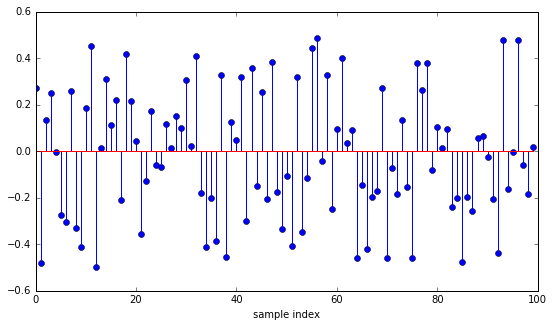

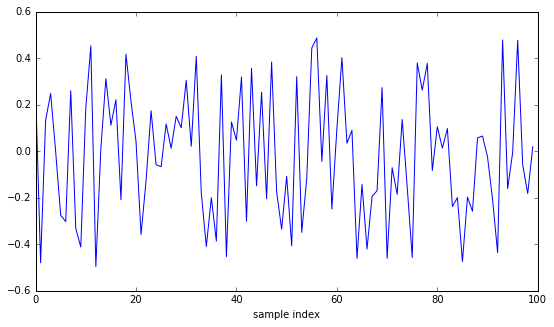

In [2]:
num_samples = 100

# set seed value (optional)
np.random.seed(10)

# generate numpy array of random numbers
x = np.random.rand(num_samples)-0.5

# plot
plt.figure(1)
plt.stem(x);
plt.xlabel('sample index');
plt.figure(2)
plt.plot(x);
plt.xlabel('sample index');

### Step 2: Manual Moving Average
Let's implement a three-sample moving average in a naive way.  We will first copy the signal three times, then we will time shift each of the signals, and finally we will sum them together.

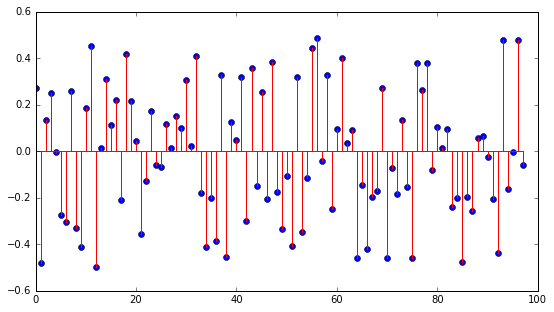

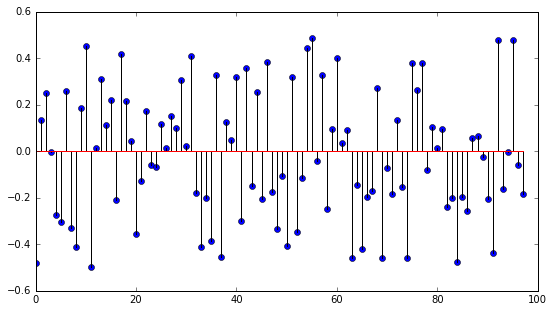

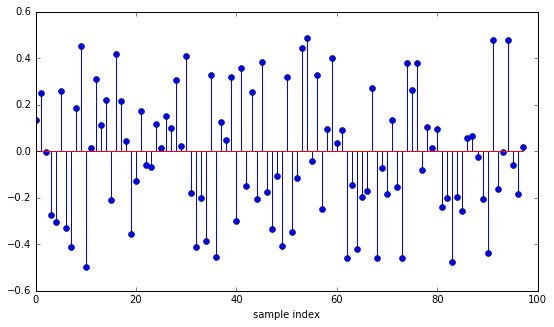

In [3]:
# import copy module
import copy

# copy element 0 through N-2
x0 = copy.copy(x[:-2])

# copy element 1 through N-1
x1 = copy.copy(x[1:-1])

# copy element 2 through N
x2 = copy.copy(x[2:])

# plot time shifted signals; verify that the time shift worked correctly
plt.figure(1)
plt.stem(x0,'r');
plt.figure(2)
plt.stem(x1,'k');
plt.figure(3)
plt.stem(x2,'b');
plt.xlabel('sample index');


### Step 2b: Sum the Signals Together
We can see that the averaging operation smooths over the most abrupt changes in the signal.  We can think of the large abrupt changes as _high frequency_ signal content.  By averaging the signal this _high frequency_ content is subdued, but the lower freqeuncy change _pass_ through the operation intact.  So intuitively, the moving average operation is a _low-pass filter_.  We will confirm this more rigorously in the next few cells.

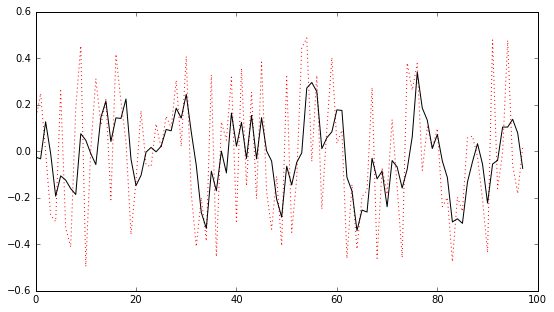

In [4]:
# add the signals together
y_manual = (x0 + x1 + x2)/3

# plot
plt.plot(x[2:],'r:');
plt.plot(y_manual,'k');

### Step 3: Filter with Convolution Operation
Recall from the slides that a filter is completely characterized by its impusle response.  For the 3-tap moving-average filter, the impulse response is $h[n] = \frac{1}{3}(\delta[n] + \delta[n-1] + \delta [n-2])$.  In Matlab/Python/etc., discrete-time signals like this are represented by a list; i.e. `h = [1/3,1/3,1/3]`.

As discussed in the slide, the operation that implements a filter is called convolution.  Conveniently, convolution is an easy routine to implement and is oftern readily available in most programming languages.  The cell below implements a 3-tap moving-average filter as a convolution.


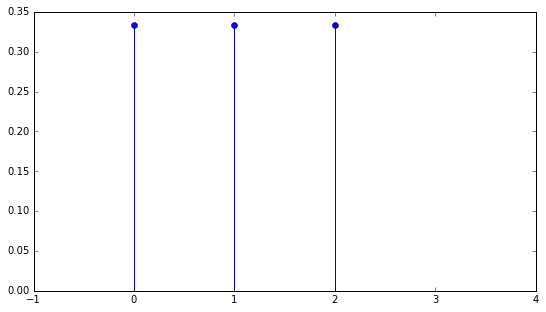

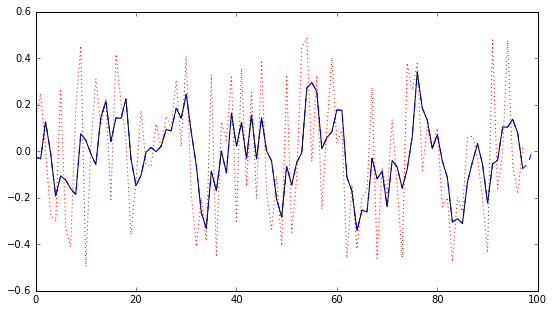

In [5]:
# define impulse response
h = np.array([1.0/3.0,1.0/3.0,1.0/3.0])

plt.figure(0)
plt.stem(h)
plt.xlim([-1,4])

y = np.convolve(h,x)

plt.figure(1)
plt.plot(x[2:],'r:');
plt.plot(y_manual,'k');
plt.plot(y[2:],'b--');

## plot without shift
# plt.plot(y,'g--');

### Step 4: Generalize to Arbitrary Order MA Filter
Generate an interactive element that plots the fitler result for a MA filter of arbitrary length.  Hint: define the impulse response with `h = np.ones(L)/L`, where `L` is the filter order.

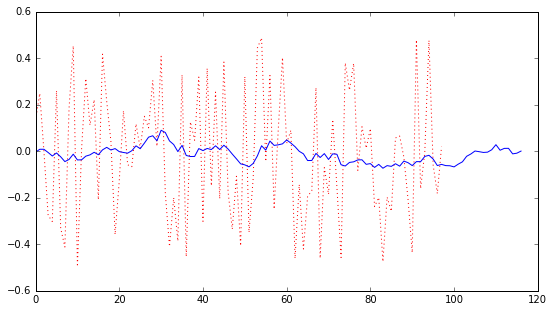

In [6]:
##########  Insert Code in this cell  ###########
def plot_ma_demo(L = 3):  # add arguments and default values
    num_samples = 100
    
    # set seed value (optional)
    np.random.seed(10)

    # generate numpy array of random numbers
    x = np.random.rand(num_samples)-0.5
    
    # create impulse response
    h = np.ones(L)/L
    
    # filter with covolution
    y = np.convolve(h,x)
    
    # plot
    plt.plot(x[2:],'r:');
    plt.plot(y[2:],'b');

interactive(plot_ma_demo, L = (1,20))  # add arguments and ranges

### Step 5a: Frequency Response w/ FFT
As we said in the lecture, a filter can also be represented in frequency.  This is often the most useful representation because it allows us to understand the pass bands and stop bands of a filter.  We can use `fft` or `freqz` to view the fitler response for FIR fitlers.

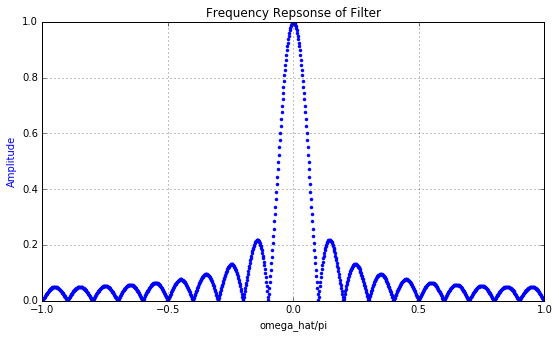

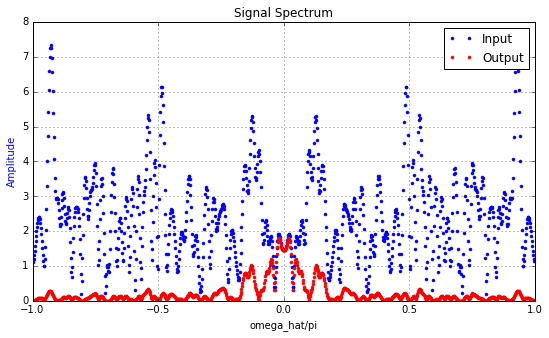

In [7]:
# filter order
L = 20
h = np.ones(L)/L

N_fft = 1024

# frequency response
# the second argument of fft is the number of fft bins to use.
freq_response = np.fft.fft(h,N_fft)

# DFT frequencies
freq = np.fft.fftfreq(freq_response.size)


# plot filter frequency response
plt.figure(1)
plt.plot(freq*2, abs(freq_response), 'b.');
plt.ylabel('Amplitude', color='b');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Frequency Repsonse of Filter');


# plot input spectrum
x_spectrum = np.fft.fft(x,N_fft)

plt.figure(2)
plt.plot(freq*2, abs(x_spectrum), 'b.', label='Input');
plt.ylabel('Amplitude', color='b');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Input Signal Spectrum');

# Plot output spectrum
y = np.convolve(h,x)
y_spectrum = np.fft.fft(y,N_fft)


plt.plot(freq*2, abs(y_spectrum), 'r.', label='Output');
plt.ylabel('Amplitude');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Signal Spectrum');
plt.legend();

### Step 5a: Frequency Response w/ freqz
Below, we use freqz to plot the repsonse. Can you spot the differences between this implementation and the fft implementation?  

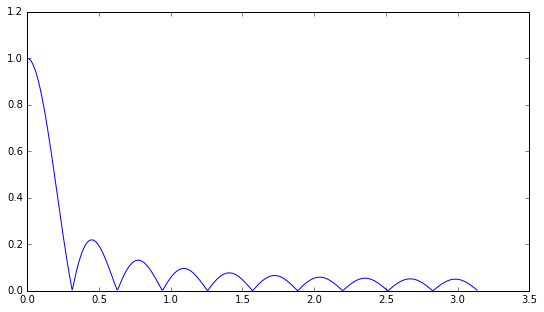

In [8]:
omega_hat, response = signal.freqz(h)
plt.plot(omega_hat,abs(response));

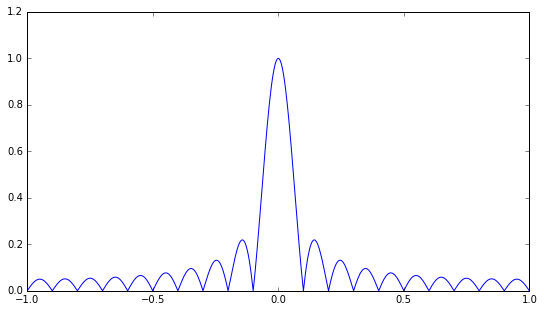

In [9]:
# plot full range of freqeuncies
omega_hat, response = signal.freqz(
    h, 
    worN=np.linspace(-np.pi,np.pi,501))
plt.plot(omega_hat/np.pi,abs(response));

In [ ]:
# plot in dB scale
plt.plot(omega_hat/np.pi,20*np.log10(abs(response)));
plt.ylim([-40,0]);
plt.grid(True)

### Step 6: Simple High-Pass Filter
Clearly averaging (summing) passes low-frequency content. A natural question is: what simple operation passes high-frequency content? 

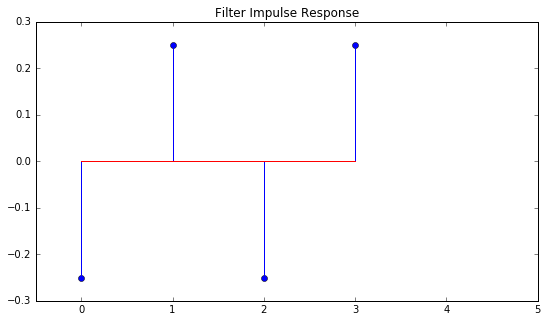

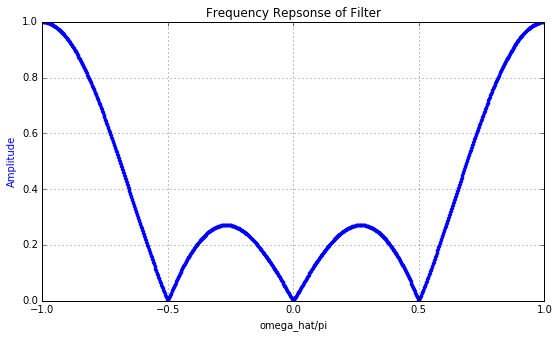

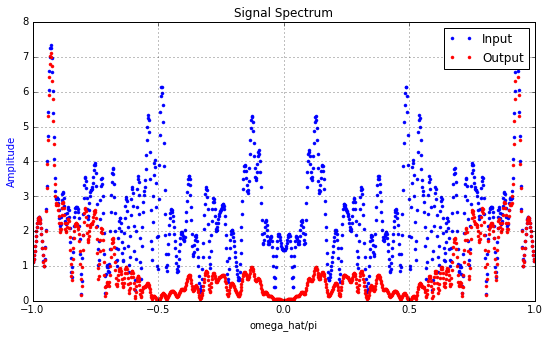

In [10]:
h = np.array([-1,1,-1,1])/4

plt.figure(0)
plt.stem(h)
plt.xlim([-.5,h.size +1])
plt.title('Filter Impulse Response')

N_fft = 1024

# frequency response
# the second argument of fft is the number of fft bins to use.
freq_response = np.fft.fft(h,N_fft)

# DFT frequencies
freq = np.fft.fftfreq(freq_response.size)


# plot filter frequency response
plt.figure(1)
plt.plot(freq*2, abs(freq_response), 'b.');
plt.ylabel('Amplitude', color='b');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Frequency Repsonse of Filter');


# plot input spectrum
x_spectrum = np.fft.fft(x,N_fft)

plt.figure(2)
plt.plot(freq*2, abs(x_spectrum), 'b.', label='Input');
plt.ylabel('Amplitude', color='b');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Input Signal Spectrum');

# Plot output spectrum
y = np.convolve(h,x)
y_spectrum = np.fft.fft(y,N_fft)


plt.plot(freq*2, abs(y_spectrum), 'r.', label='Output');
plt.ylabel('Amplitude');
plt.xlabel('omega_hat/pi');
plt.grid(True);
plt.title('Signal Spectrum');
plt.legend();

### Step 7: Shift a Filter in Frequency
Recall the simple convolution identity, where we have a filter $H(\hat{\omega})$ and a shifted impulse $\delta(\hat{\omega} - 0.2 \pi)$.  The convolution of these two signals is just a shifted version of the frequency response: $H(\hat{\omega})\star \delta(\hat{\omega} - 0.2 \pi) = H(\hat{\omega} - 0.2 \pi)$.  Also recall that the spectrum of $\cos(\omega n)$ is $0.5\delta(\hat{\omega} - \omega) + 0.5\delta(\hat{\omega} + \omega)$.

Since convolution is a linear operation, we have $\bar{H}(\hat{\omega}) = H(\hat{\omega})\star 0.5\delta(\hat{\omega} - \omega) + 0.5\delta(\hat{\omega} + \omega) = 0.5H(\hat{\omega} - \omega) + 0.5H(\hat{\omega} + \omega)$.  This can be accomplished in the time domain using multiplication: $\bar{h}[n] = h[n] \cdot \cos(\omega n)$.

This turns out to be a very convient way to shift a low pass filter to become a band-pass or high-pass filter as the cell below illustrates.

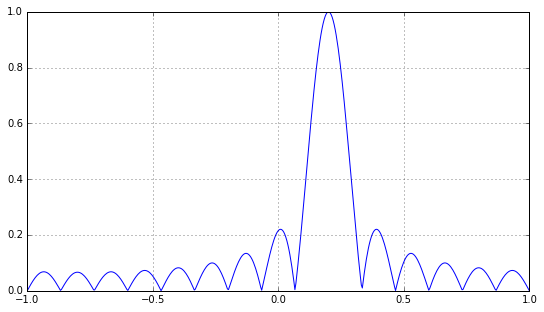

In [11]:
# define filter
L = 15
h = np.ones(L)/L

# define shifting signal
n_range  = np.arange(L)
omega_shift = 0.2*np.pi
# shift_signal = np.cos(omega_shift*n_range)

## one-sided shift
shift_signal = np.exp(1j*omega_shift*n_range)

# time-domain shifted signal
h_shifted = h * shift_signal

# find response and plot
omega_hat, response = signal.freqz(h_shifted, worN=np.linspace(-np.pi,np.pi,500))
plt.plot(omega_hat/np.pi,abs(response));
plt.grid(True)

### Step 8: Exercise
Create an interactive widget with the following specs

#### Inputs:
- MA filter length (L)
- Shift Frequency

#### Outputs:
- Time-domain stem plot of MA filter
- Time-domain stem plot of shift signal
- Time-domain stem plot of shifted filter $\bar{h}[n]$.
- Two-sided freqz plot of $\bar{H}(\hat{\omega})$




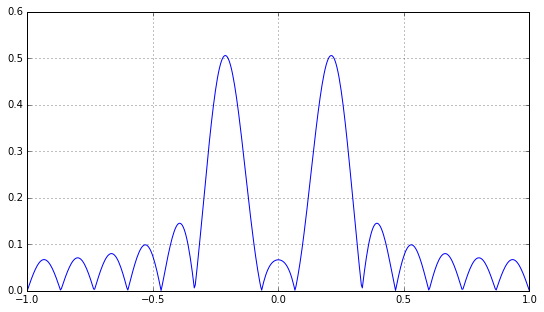

In [12]:
##########  Insert Code in this cell  ###########
def plot_shifted_ma_demo(L=15,shift_freq=0.2):  # add arguments and default values
    
    # define filter
#     L = 15
    h = np.ones(L)/L

    # define shifting signal
    n_range  = np.arange(L)
    omega_shift = shift_freq*np.pi
    shift_signal = np.cos(omega_shift*n_range)

    ## one-sided shift
#     shift_signal = np.exp(1j*omega_shift*n_range)

    # time-domain shifted signal
    h_shifted = h * shift_signal

    # find response and plot
    omega_hat, response = signal.freqz(h_shifted, worN=np.linspace(-np.pi,np.pi,500))
    plt.plot(omega_hat/np.pi,abs(response));
    plt.grid(True)

interactive(plot_shifted_ma_demo,L=(3,20),shift_freq=(-1.0,1.0))  # add arguments and ranges

### Step 9: Filter Design
Python, Matlab, and GnuRadio all have convient functions that will design a filter given a frequency response specification.  In python the function list is at `http://docs.scipy.org/doc/scipy/reference/signal.html#filter-design`.  After you run the two cells below, zoom in to the transition region.  What is the value of the filter response at the transition?  Is that suitable?

Play with the `width` argument in `firwin` to see if you can improve the transition performance.  Also modify the `numtaps` value and observe the effect.

In [13]:
# enable interactive plots
import matplotlib.pyplot as plt,mpld3
mpld3.enable_notebook()

ImportError: No module named mpld3

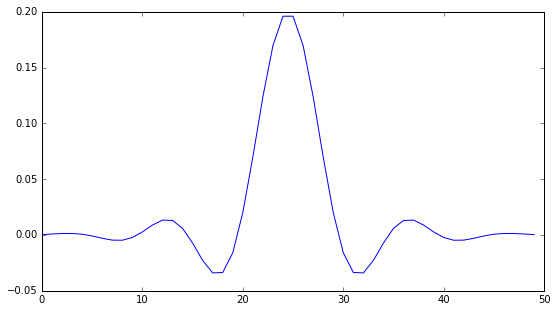

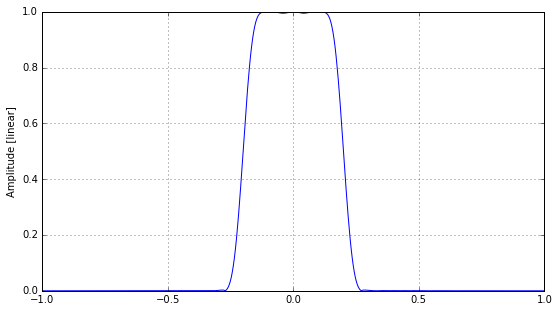

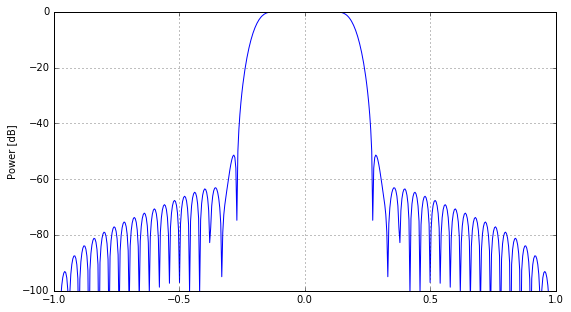

In [14]:
# low pass filter
f_cutoff = 0.2
numtaps = 50
h = signal.firwin(numtaps, f_cutoff)
# h = signal.firwin(numtaps, f_cutoff, width = 0.001)
plt.figure(0)
plt.plot(h)

# plot response in linear units
omega_hat, response = signal.freqz(h, worN=np.linspace(-np.pi,np.pi,500))
plt.figure(1)
plt.plot(omega_hat/np.pi,abs(response));
plt.grid(True)
plt.ylabel('Amplitude [linear]')

# plot response in dB
plt.figure(2)
plt.plot(omega_hat/np.pi,20*np.log10(abs(response)));
plt.ylim([-100,0])
plt.ylabel('Power [dB]');
plt.grid(True)